<a href="https://colab.research.google.com/github/Hungcodes/CSS/blob/main/Exercise_3_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

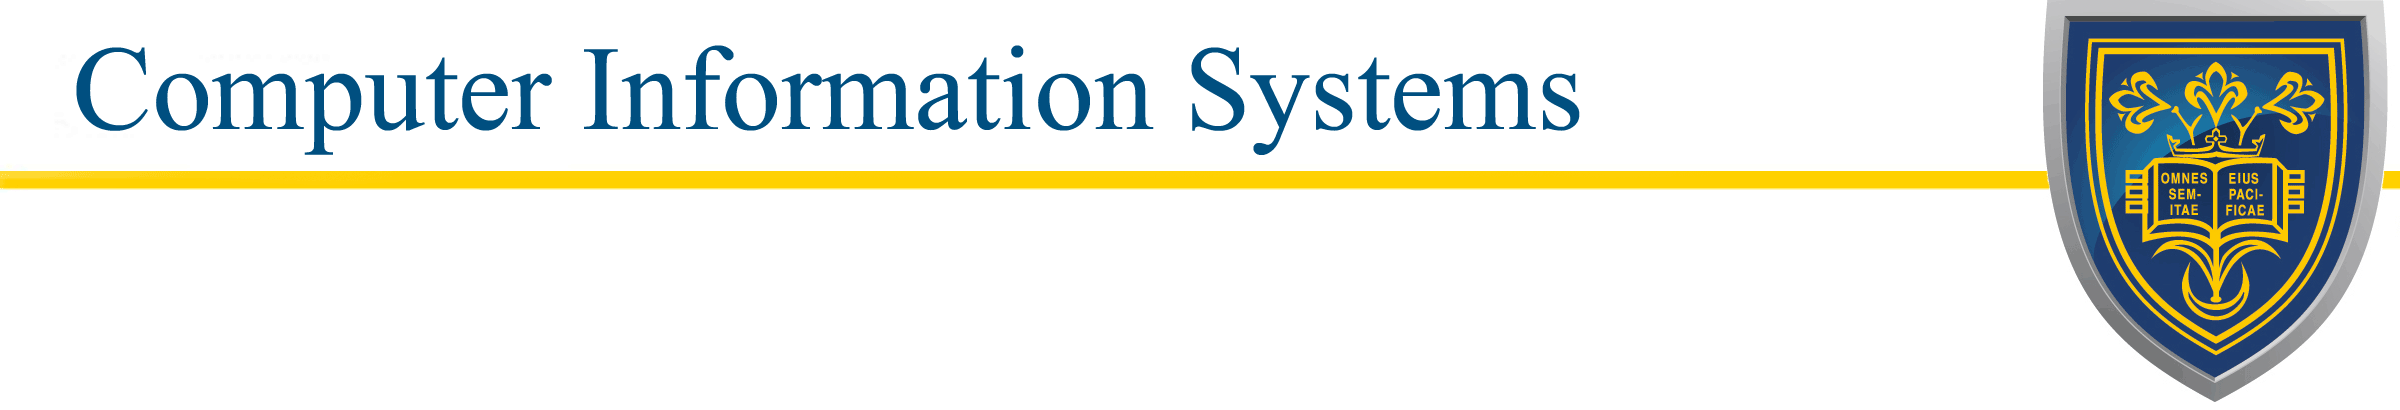


# **Exercise 3 - Linear Regression Models**
In this notebook, the Car Prices dataset is loaded, an explortaoty data analysis conducted, the dataset prepared for analysis, and linear regression models developed.

The notebook is broken down by steps that correspond with the steps outlined in the [Exercise 3 assignment](https://docs.google.com/document/d/18fNY_KYS4C0F2aIdD2VNOov3sb5X43VTiNi89a_Agq4/edit?usp=sharing). Additionally, I included comments within the code to help you understand the purpose of the code.

Please execute this notebook in the correct order and pay close attention to the output as well as the code used to generate this output. You must be able to follow the code in a manner that allows you to write your own code. The code comments and my write up in the notebook should provide you with an example of the type of comments I expect to see in your R scripts.

**Step 1: Load the dataset into your RStuido environment**

In this step, the coded is downloaded from my Github account using a unique URL and loaded into the Cars dataframe. Once the dataframe is loaded, I conduct a quick summary to see the format and structure of the data in the dataframe.

The column names are fairly self explanitory but I have a [data dictionary here](https://raw.githubusercontent.com/itprofessor-git/analytics/master/CarPricesDictionary.png) so that you may better understand the columns and the values for each column.

In [ ]:
#install libraries that are not a part of the defaul Colab library
#Note: Installing packages not within defult Colab. This takes a few minutes: please be patient
install.packages(c('ggpubr','ggcorrplot','Metrics'))

#load all libraries needed for this analysis
library(tidyverse)  #for data transformation and ggplot2
library(ggpubr)     #for presenting groupings of plots
library(ggcorrplot) #needed to create a correlation matrix
library(Metrics)    #needed to calculate RMSE of the model predictions

#load data from My GitHub account
url <- "https://raw.githubusercontent.com/itprofessor-git/analytics/master/CarPrices.csv"
Cars <- read.csv(url, header = TRUE)

#review the Real Estate data to see the number of rows and columns and the names of the colums
str(Cars)           #view the structure of the dataframe

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘plyr’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘reshape2’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


'data.frame':	205 obs. of  26 variables:
 $ car_ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ symboling       : int  3 3 1 2 2 2 1 1 1 0 ...
 $ CarName         : chr  "alfa-romero giulia" "alfa-romero stelvio" "alfa-romero Quadrifoglio" "audi 100 ls" ...
 $ fueltype        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration      : chr  "std" "std" "std" "std" ...
 $ doornumber      : chr  "two" "two" "two" "four" ...
 $ carbody         : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drivewheel      : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ enginelocation  : chr  "front" "front" "front" "front" ...
 $ wheelbase       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ carlength       : num  169 169 171 177 177 ...
 $ carwidth        : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ carheight       : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curbweight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ enginetype      : chr  "dohc" "dohc" "ohc

**Step 2: Conduct an Exploratory Data Analysis**

In this step, an exploratory data analysis is conducted to study key data columns and determined potential correlations for the regression ananlysis.


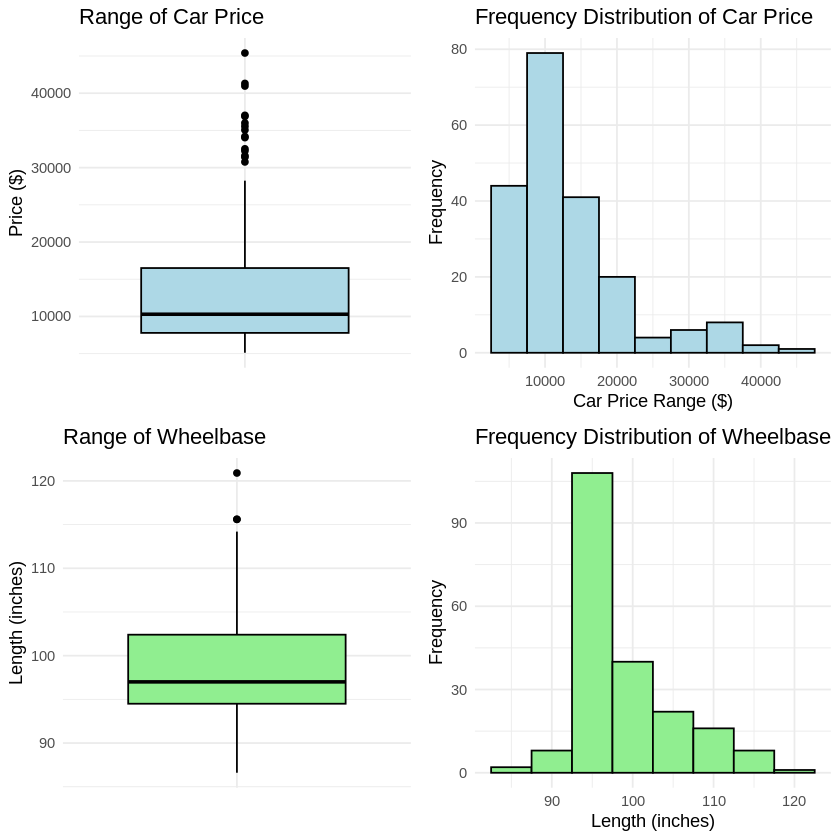

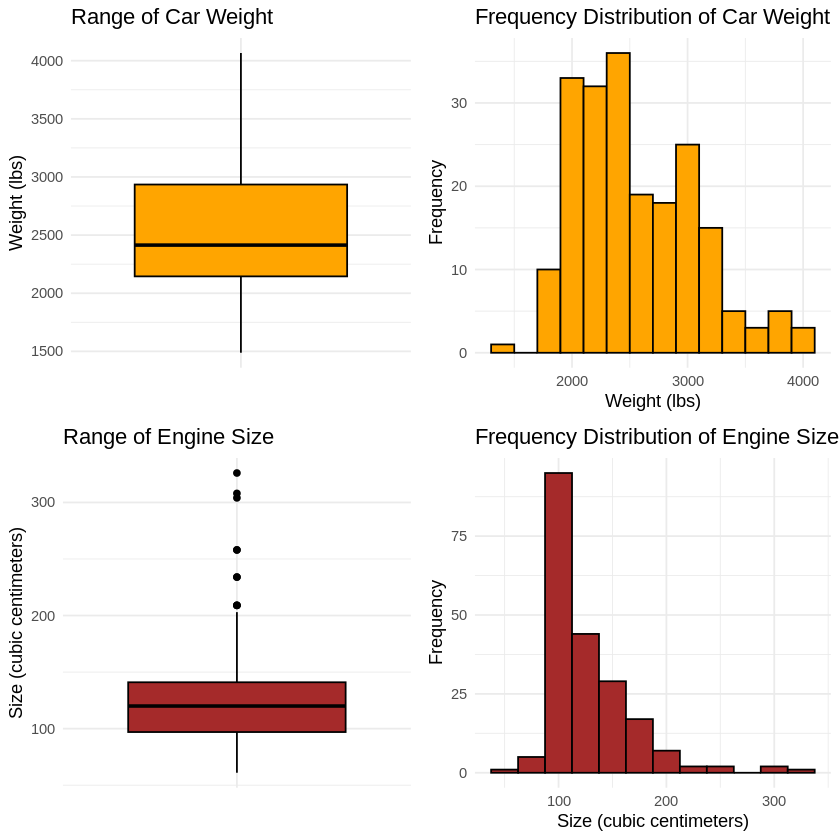

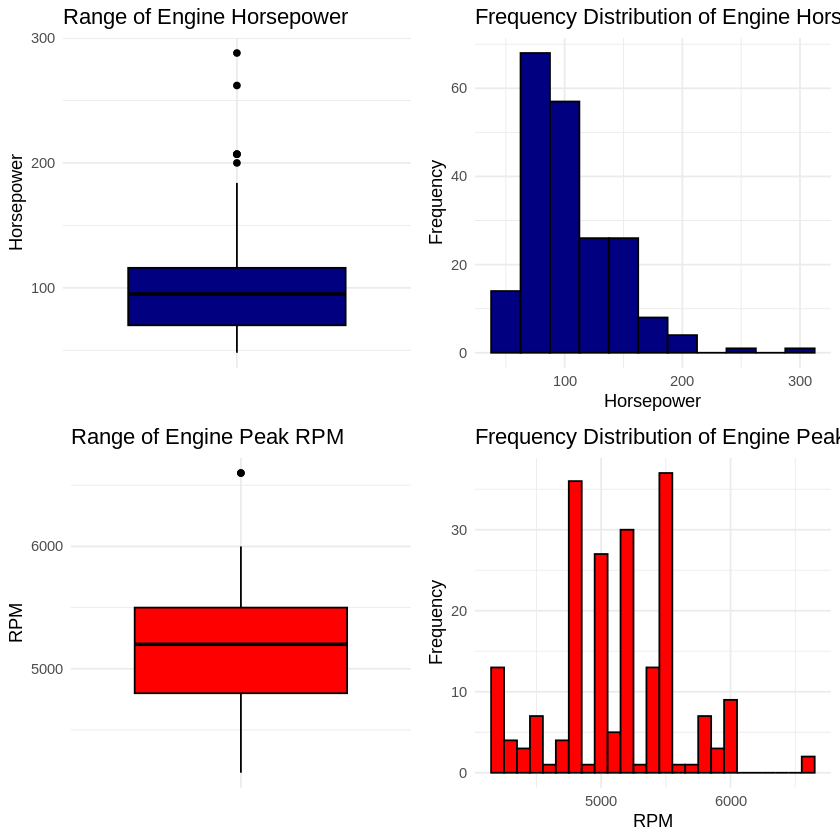

In [ ]:
#EDA

#Linear Regression models evaluate relationships between two quantitative
#variables. The price variable serves as the dependent variable for these models.
#Potential quantitative independent predictor variables include: wheelbase,
#curbweight, enginesize, horsepower, and peakrpm.
#Additionally, since data may need to be limited (filtered) in order to better fit a
#regression model, additional categorical variables need to be studied. These
#categorical variables include: fueltype, aspiration, and carbody.

#EDA - Evaluate the range and distribution for all quantitative variables

#Box and Whisker plot and frequency distribution for: price
EDA1a <-
  ggplot(Cars, aes(x = "", y = price)) +
    geom_boxplot(fill = "lightblue", color = "black") +
    labs(title = "Range of Car Price", x = "", y = "Price ($)") +
    theme_minimal()

EDA1b <-
  ggplot(Cars, aes(x = price)) +
    geom_histogram(binwidth = 5000, fill = "lightblue", color = "black", aes(y = after_stat(count))) +
    labs(title = "Frequency Distribution of Car Price", x = "Car Price Range ($)", y = "Frequency") +
    theme_minimal()


#Box and Whisker plot and frequency distribution for: wheelbase
EDA2a <-
  ggplot(Cars, aes(x = "", y = wheelbase)) +
    geom_boxplot(fill = "lightgreen", color = "black") +
    labs(title = "Range of Wheelbase", x = "", y = "Length (inches)") +
    theme_minimal()

EDA2b <-
  ggplot(Cars, aes(x = wheelbase)) +
    geom_histogram(binwidth = 5, fill = "lightgreen", color = "black", aes(y = after_stat(count))) +
    labs(title = "Frequency Distribution of Wheelbase", x = "Length (inches)", y = "Frequency") +
    theme_minimal()


#Box and Whisker plot and frequency distribution for: curbweight
EDA3a <-
  ggplot(Cars, aes(x = "", y = curbweight)) +
    geom_boxplot(fill = "orange", color = "black") +
    labs(title = "Range of Car Weight", x = "", y = "Weight (lbs)") +
    theme_minimal()

EDA3b <-
  ggplot(Cars, aes(x = curbweight)) +
    geom_histogram(binwidth = 200, fill = "orange", color = "black", aes(y = after_stat(count))) +
    labs(title = "Frequency Distribution of Car Weight", x = "Weight (lbs)", y = "Frequency") +
    theme_minimal()


#Box and Whisker plot and frequency distribution for: enginesize
EDA4a <-
  ggplot(Cars, aes(x = "", y = enginesize)) +
    geom_boxplot(fill = "brown", color = "black") +
    labs(title = "Range of Engine Size", x = "", y = "Size (cubic centimeters)") +
    theme_minimal()

EDA4b <-
  ggplot(Cars, aes(x = enginesize)) +
    geom_histogram(binwidth = 25, fill = "brown", color = "black", aes(y = after_stat(count))) +
    labs(title = "Frequency Distribution of Engine Size", x = "Size (cubic centimeters)", y = "Frequency") +
    theme_minimal()


#Box and Whisker plot and frequency distribution for: horsepower
EDA5a <-
  ggplot(Cars, aes(x = "", y = horsepower)) +
    geom_boxplot(fill = "navyblue", color = "black") +
    labs(title = "Range of Engine Horsepower", x = "", y = "Horsepower") +
    theme_minimal()

EDA5b <-
  ggplot(Cars, aes(x = horsepower)) +
    geom_histogram(binwidth = 25, fill = "navyblue", color = "black", aes(y = after_stat(count))) +
    labs(title = "Frequency Distribution of Engine Horsepower", x = "Horsepower", y = "Frequency") +
    theme_minimal()


#Box and Whisker plot and frequency distribution for: peakrpm
EDA6a <-
  ggplot(Cars, aes(x = "", y = peakrpm)) +
    geom_boxplot(fill = "red", color = "black") +
    labs(title = "Range of Engine Peak RPM", x = "", y = "RPM") +
    theme_minimal()

EDA6b <-
  ggplot(Cars, aes(x = peakrpm)) +
    geom_histogram(binwidth = 100, fill = "red", color = "black", aes(y = after_stat(count))) +
    labs(title = "Frequency Distribution of Engine Peak RPM", x = "RPM", y = "Frequency") +
    theme_minimal()

#Diplay sets of plots in a 2x2 matrix
ggarrange(EDA1a, EDA1b, EDA2a, EDA2b, ncol=2, nrow=2)
ggarrange(EDA3a, EDA3b, EDA4a, EDA4b, ncol=2, nrow=2)
ggarrange(EDA5a, EDA5b, EDA6a, EDA6b, ncol=2, nrow=2)

#Cleanup
rm(EDA1a, EDA1b, EDA2a, EDA2b, EDA3a, EDA3b, EDA4a, EDA4b, EDA5a, EDA5b, EDA6a, EDA6b)

'data.frame':	205 obs. of  6 variables:
 $ price     : num  13495 16500 16500 13950 17450 ...
 $ wheelbase : num  88.6 88.6 94.5 99.8 99.4 ...
 $ curbweight: int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ enginesize: int  130 130 152 109 136 136 136 136 131 131 ...
 $ horsepower: int  111 111 154 102 115 110 110 110 140 160 ...
 $ peakrpm   : int  5000 5000 5000 5500 5500 5500 5500 5500 5500 5500 ...


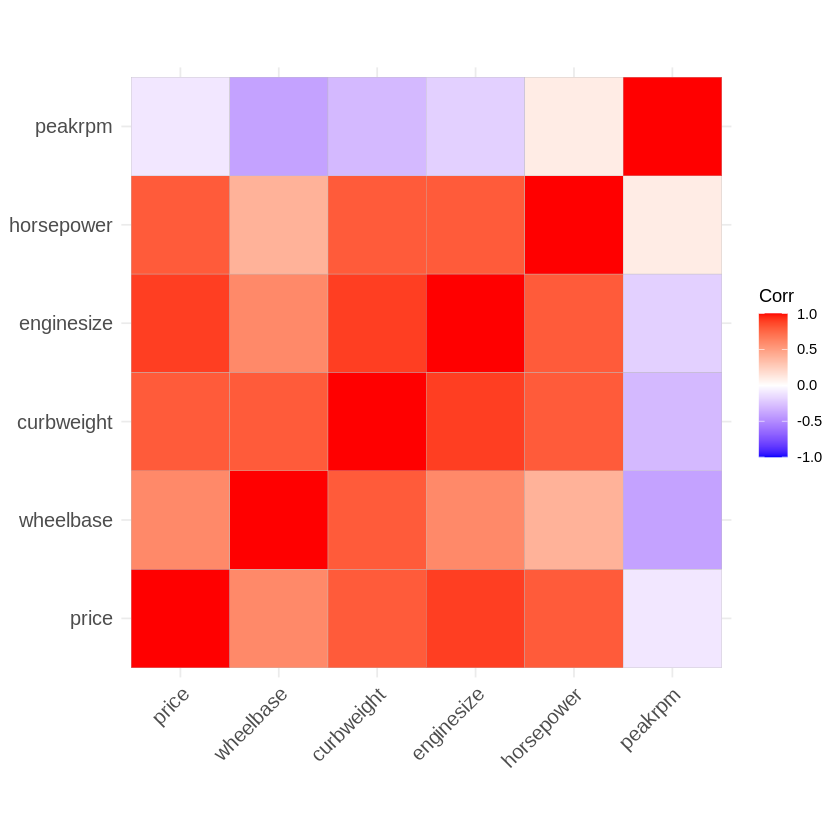

In [ ]:
#EDA - Evaluate Candidate Correlations

#Begin with a Correlation Matrix
#Subset the Cars dataframe to include only the variables of interest
CarsCorr <- Cars[c(26,10,14,17,22,23)]
str(CarsCorr)

#Compute correlations
corr <- round(cor(CarsCorr), 1)

#Display matrix
ggcorrplot(corr)

#Based on the results in the matrix, correlations between price and
#curbweight, enginesize, horsepower, and peakrpm will be evaluated

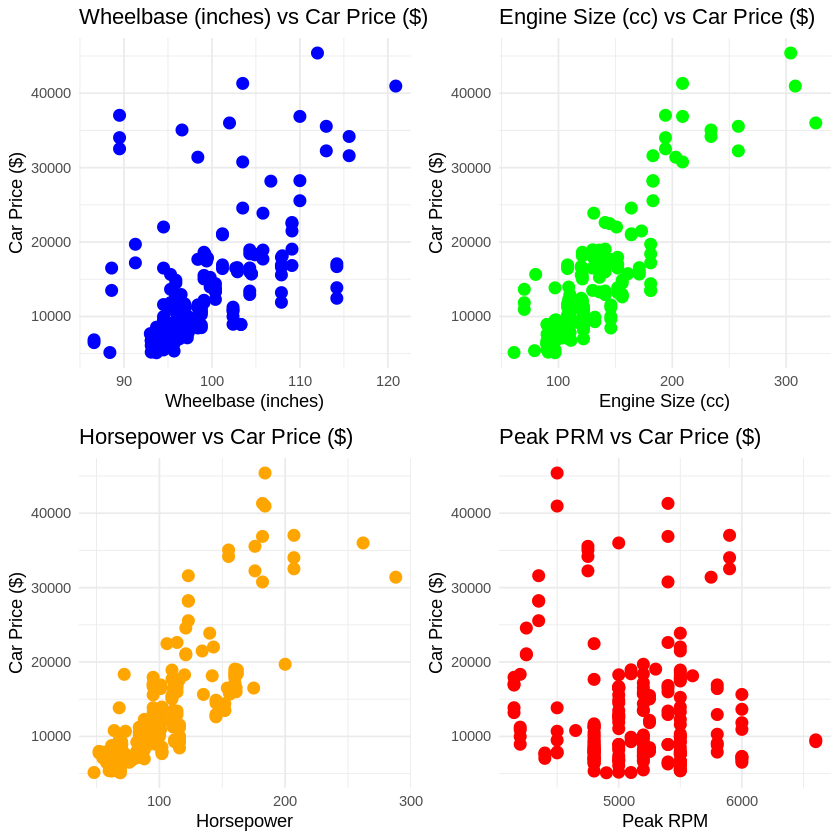

In [ ]:
#EDA - Evaluate Correlations

#Correlation between Price and Wheelbase
# Create a ggplot scatter plot object and specify the data and aesthetics
EDA7a <-
  ggplot(Cars, aes(x = wheelbase, y = price)) +
    geom_point(color = "blue", size = 3) +
    labs(title = "Wheelbase (inches) vs Car Price ($)", x = "Wheelbase (inches)", y = "Car Price ($)") +
    theme_minimal()

#Correlation between Price and Engine Size
# Create a ggplot scatter plot object and specify the data and aesthetics
EDA7b <-
  ggplot(Cars, aes(x = enginesize, y = price)) +
    geom_point(color = "green", size = 3) +
    labs(title = "Engine Size (cc) vs Car Price ($)", x = "Engine Size (cc)", y = "Car Price ($)") +
    theme_minimal()

#Correlation between Price and Horsepoer
# Create a ggplot scatter plot object and specify the data and aesthetics
EDA7c <-
  ggplot(Cars, aes(x = horsepower, y = price)) +
    geom_point(color = "orange", size = 3) +
    labs(title = "Horsepower vs Car Price ($)", x = "Horsepower", y = "Car Price ($)") +
    theme_minimal()

#Correlation between Price and Peak RPM
# Create a ggplot scatter plot object and specify the data and aesthetics
EDA7d <-
  ggplot(Cars, aes(x = peakrpm, y = price)) +
    geom_point(color = "red", size = 3) +
    labs(title = "Peak PRM vs Car Price ($)", x = "Peak RPM", y = "Car Price ($)") +
    theme_minimal()

#Diplay sets of plots in a 2x2 matrix
ggarrange(EDA7a, EDA7b, EDA7c, EDA7d, ncol=2, nrow=2)

#Cleanup
rm(EDA7a, EDA7b, EDA7c, EDA7d)

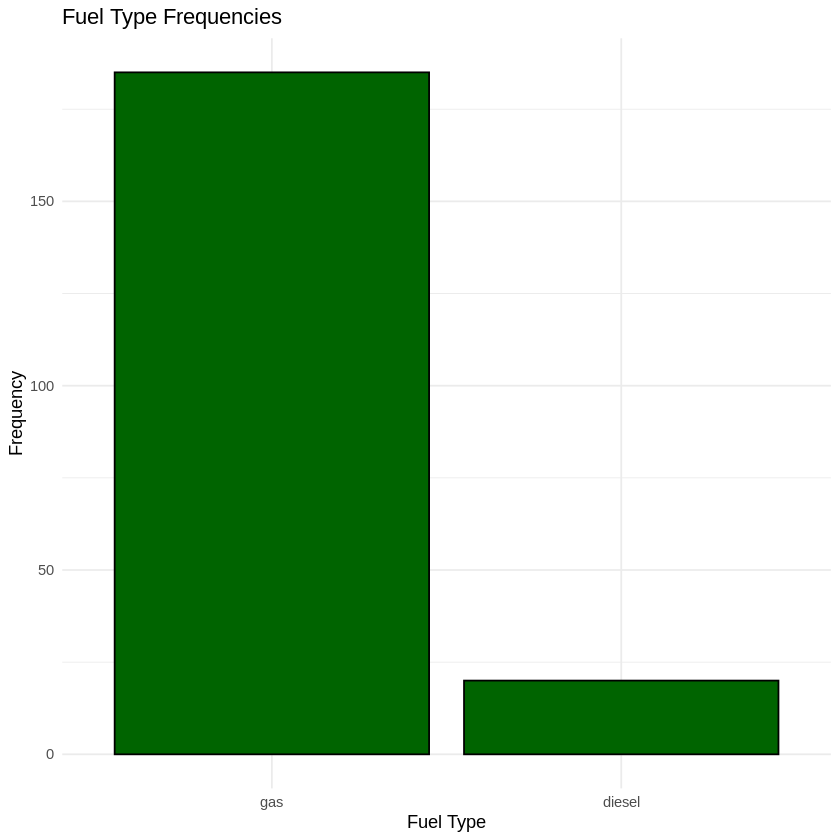

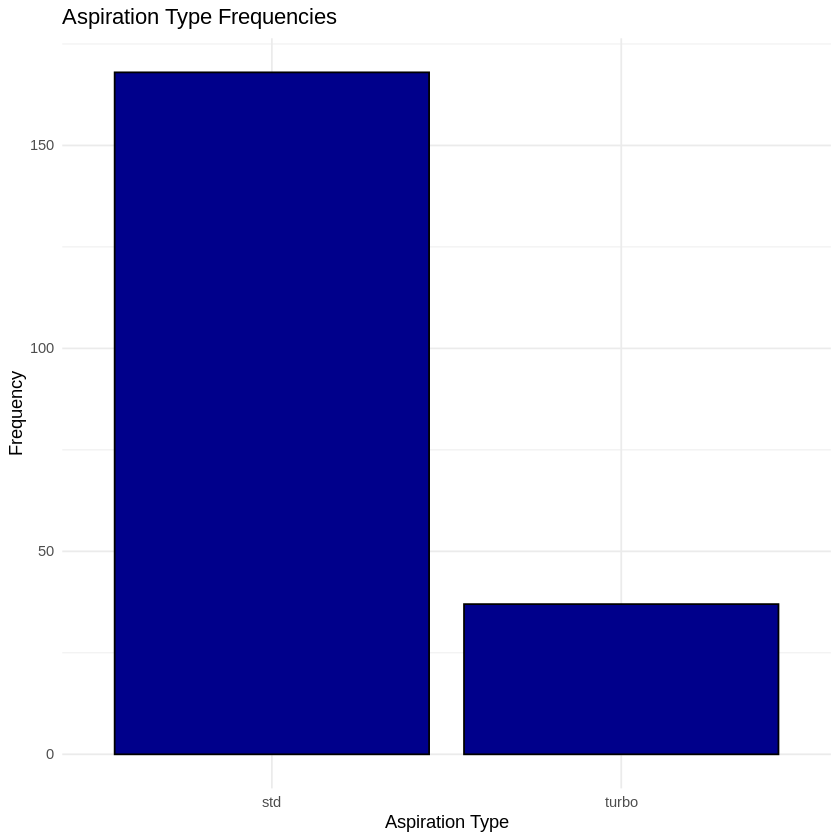

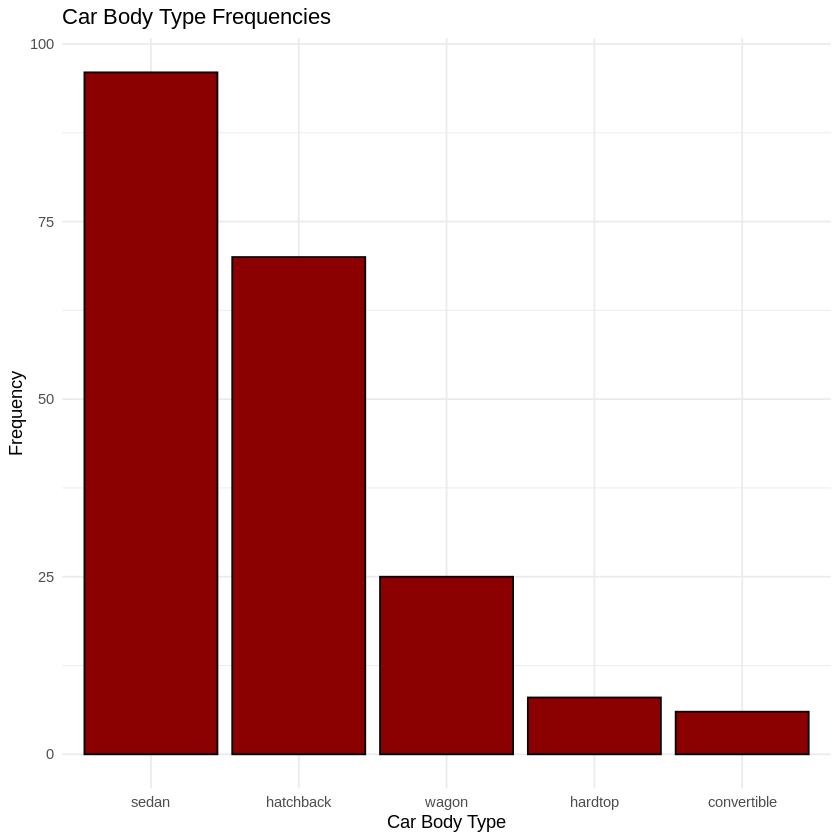

In [ ]:
#EDA - Evaluate Categorical Variables
#Plot the frequency distribution of the categorical variables identified as of
#interest in this analysis: fueltype, aspiration, and carbody

# Create a ggplot bar chart object and specify the data and aesthetics for fuel type
  ggplot(Cars, aes(x = reorder(as.factor(fueltype), fueltype, function(x)-length(x)))) +
    geom_bar(fill = "darkgreen", color = "black") +
    labs(title = "Fuel Type Frequencies", x = "Fuel Type", y = "Frequency") +
    theme_minimal()

# Create a ggplot bar chart object and specify the data and aesthetics for aspiration type
  ggplot(Cars, aes(x = reorder(as.factor(aspiration), aspiration, function(x)-length(x)))) +
    geom_bar(fill = "darkblue", color = "black") +
    labs(title = "Aspiration Type Frequencies", x = "Aspiration Type", y = "Frequency") +
    theme_minimal()

# Create a ggplot bar chart object and specify the data and aesthetics for car body type
  ggplot(Cars, aes(x = reorder(as.factor(carbody), carbody, function(x)-length(x)))) +
    geom_bar(fill = "darkred", color = "black") +
    labs(title = "Car Body Type Frequencies", x = "Car Body Type", y = "Frequency") +
    theme_minimal()

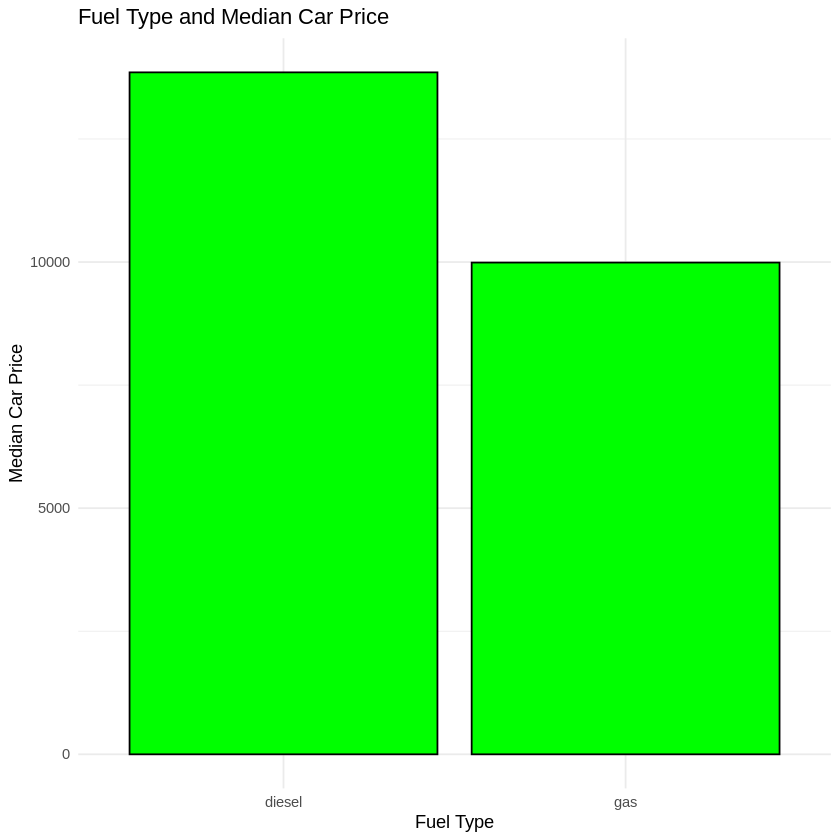

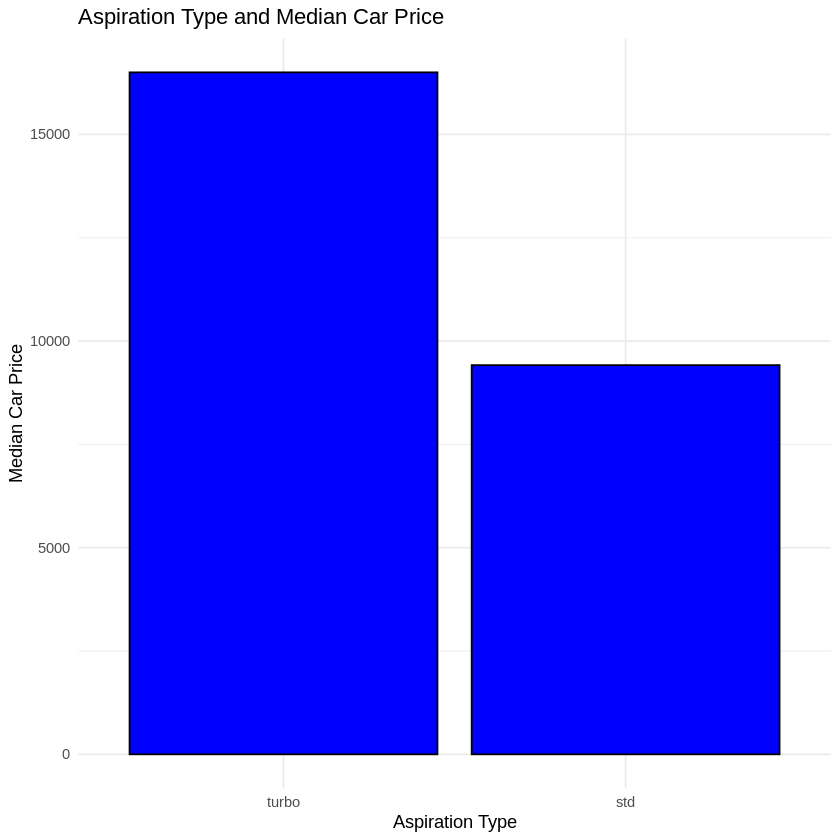

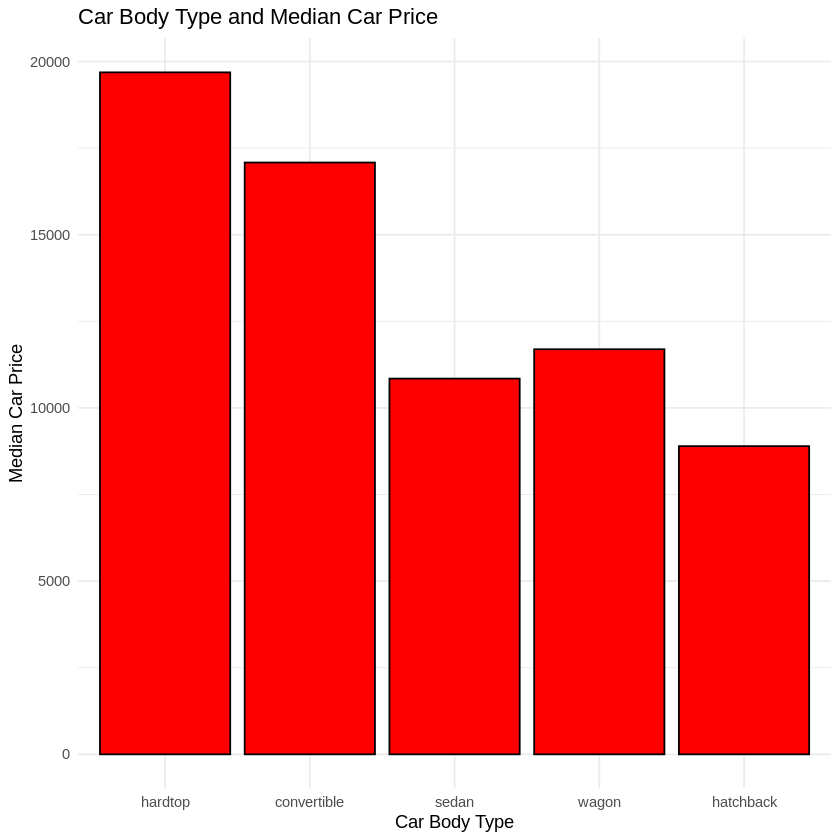

In [ ]:
#EDA - Categorical Values Influence on Price
#Plot the categorical values and their relationship with car price
#to see if certain categories influence the price more than others

# Create a ggplot bar chart object and specify the data and aesthetics for fuel type
ggplot(Cars, aes(x = reorder(fueltype, -price), y = price)) +
  geom_bar(stat='summary', fun='median', fill = "green", color = "black") +
  labs(title = "Fuel Type and Median Car Price", x = "Fuel Type", y = "Median Car Price") +
  theme_minimal()

# Create a ggplot bar chart object and specify the data and aesthetics for aspiration type
ggplot(Cars, aes(x = reorder(aspiration, -price), y = price)) +
  geom_bar(stat='summary', fun='median', fill = "blue", color = "black") +
  labs(title = "Aspiration Type and Median Car Price", x = "Aspiration Type", y = "Median Car Price") +
  theme_minimal()

# Create a ggplot bar chart object and specify the data and aesthetics for car body type
ggplot(Cars, aes(x = reorder(carbody, -price), y = price)) +
  geom_bar(stat='summary', fun='median', fill = "red", color = "black") +
  labs(title = "Car Body Type and Median Car Price", x = "Car Body Type", y = "Median Car Price") +
  theme_minimal()

**Step 3: Evaluate the Results from the Exploratory Data Analysis**

After conducting the EDA, describe your findings and how these findings are going to be used in your Regression study. The findings should include description of your key quantitative variables, correlations of your variables, and any fitering needed based on the results of your categorical variable evaluations.

In [ ]:
#Quantitative Variable Evaluation
#1. Price - the price variable is a right tailed distribution with a few outliers
#   these outliers do not appear to be sufficient to dramatically influence a model
#2. Car Weight - the weight of the car is within an expected range but the distribution
#   does not appear to have any type of normal distribution
#3. Engine Size - the size of the engine has a few outliers that should not influence
#   the model and the distribution is a right tailed distribution as expected
#4. Engine Horsepower - similar to engine size, it has a few inconsequential outliers
#   and a right tailed distribution
#5  Peak RPMs - does not have much of a range and fits a right tailed distribution

#Correlation Evaluations
#Based on the correlation matrix, curbweight, enginesize, horsepower, and peakrpm
#demonstrated moderate correlations with price. Each was visually evaluated using
#a scatter plot. The results showed curbweight, enginesize, and horsepower appeared
#to have a positive correlation with car price.

#Categoricial Variable Evaluation
#Based on the results of the categorical variables, fuel type and aspiration types
#influenced car prices. At this point, no filtering is needed but filtering may
#be considered to limit to gas and standard aspiration if model refinements are required
#later on in the study.

**Step 4: Preare and Split the Dataset**

In this step, create a working dataframe for the variables you selected for your analysis. Then, randomly split the working dataframe into two sections based on the split ratio. In this case, the larger portion of the randomized subset is copied into the “train” dataframe that is used to build or train the regression model. The second portion of the randomized subset is copied into the “text” dataframe that is used to test the linear regression model.

In [ ]:
#Preparing Working Dataframee
#Create a working dataframe containing only the variables evaluated in the
#EDA study
CarsStudy <- Cars[c(26,10,14,17,22,23)]

#view the structure of the created dataset
str(CarsStudy)


#Splitting Dataset
#split the data into training (75%) and testing (25%) where the split ratio idicates the percentage
#of rows moving to the training dataset and verify the proper splitting

set.seed(123)
sample <- sample(c(TRUE, FALSE), nrow(CarsStudy), replace=TRUE, prob=c(0.75, 0.25))
train <- CarsStudy[sample, ]
test <- CarsStudy[!sample, ]

writeLines("\nData Split Distribution")
cat("Training Data - Count:", nrow(train), "  Proportion:",round(nrow(train)/(nrow(train)+nrow(test)),digits=2),'\n')
cat("Testing Data  - Count:", nrow(test), "   Proportion:",round(nrow(test)/(nrow(train)+nrow(test)),digits=2))

'data.frame':	205 obs. of  6 variables:
 $ price     : num  13495 16500 16500 13950 17450 ...
 $ wheelbase : num  88.6 88.6 94.5 99.8 99.4 ...
 $ curbweight: int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ enginesize: int  130 130 152 109 136 136 136 136 131 131 ...
 $ horsepower: int  111 111 154 102 115 110 110 110 140 160 ...
 $ peakrpm   : int  5000 5000 5000 5500 5500 5500 5500 5500 5500 5500 ...

Data Split Distribution
Training Data - Count: 157   Proportion: 0.77 
Testing Data  - Count: 48    Proportion: 0.23

**Step 5: Build Linear Regression Models**

Preparing a simple linear regression model for each of the variables identified as potential correltations with the car prices: curbweight, enginesize, and horsepower. Then, create a multiple linear regression model using all three variables as predictors for the car price.


Call:
lm(formula = price ~ curbweight, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11851.3  -2251.2   -419.8   1307.9  20525.1 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20768.176   1895.591  -10.96   <2e-16 ***
curbweight      13.311      0.736   18.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4657 on 155 degrees of freedom
Multiple R-squared:  0.6785,	Adjusted R-squared:  0.6764 
F-statistic: 327.1 on 1 and 155 DF,  p-value: < 2.2e-16


The slope of the regression line is 13.31 and the intercept is -20768.18 .

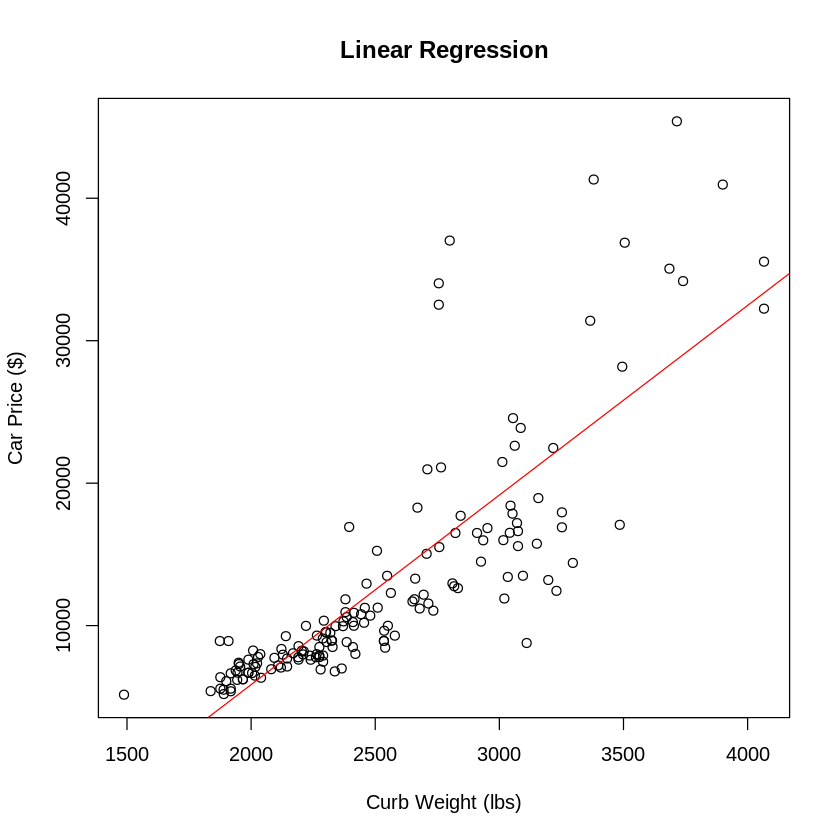

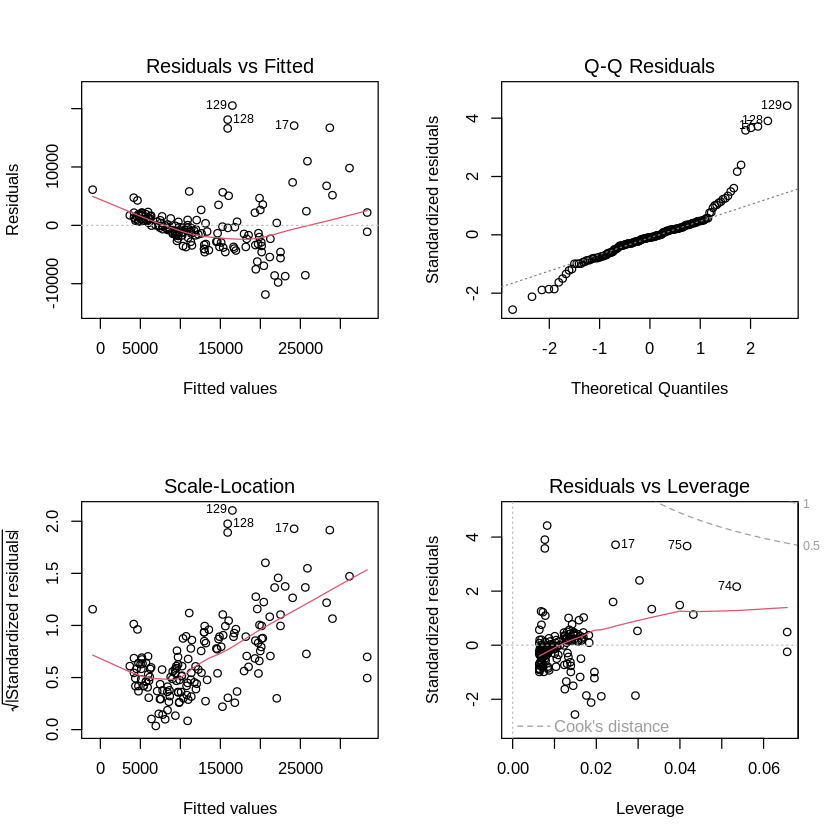

In [ ]:
#Developing a linear regression model between curbweight and price

#create the linear regression model
modelCurb <- lm(price ~ curbweight, data = train)

#view the linear regression model
summary(modelCurb)

#visualize the results with a scatter plot and regression line
plot(train$curbweight, train$price, main = "Linear Regression", xlab = "Curb Weight (lbs)", ylab = "Car Price ($)")
abline(modelCurb, col = "red")

# Report the results
cat("The slope of the regression line is", round(coef(modelCurb)[2], 2), "and the intercept is", round(coef(modelCurb)[1], 2), ".")

# Plot the residuals but first set display to a 2x2 format
par(mfrow=c(2,2))
plot(modelCurb)
par(mfrow=c(1,1))


Call:
lm(formula = price ~ enginesize, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9292.7 -1917.5  -145.2  1228.8 13499.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9687.08     945.35  -10.25   <2e-16 ***
enginesize    179.44       7.16   25.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3654 on 155 degrees of freedom
Multiple R-squared:  0.8021,	Adjusted R-squared:  0.8008 
F-statistic: 628.1 on 1 and 155 DF,  p-value: < 2.2e-16


The slope of the regression line is 179.44 and the intercept is -9687.08 .

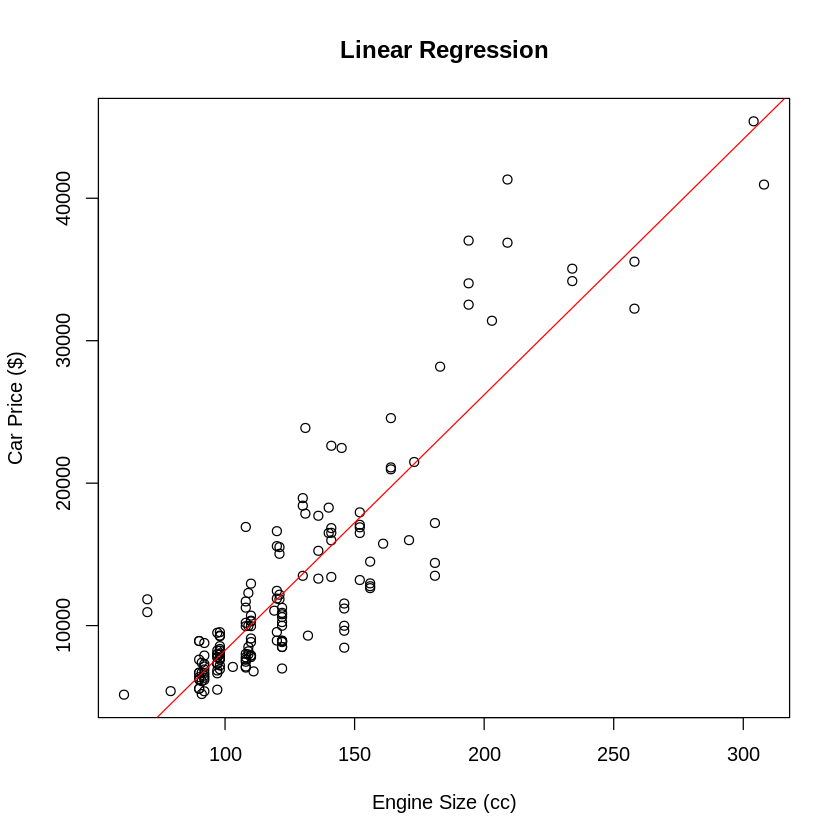

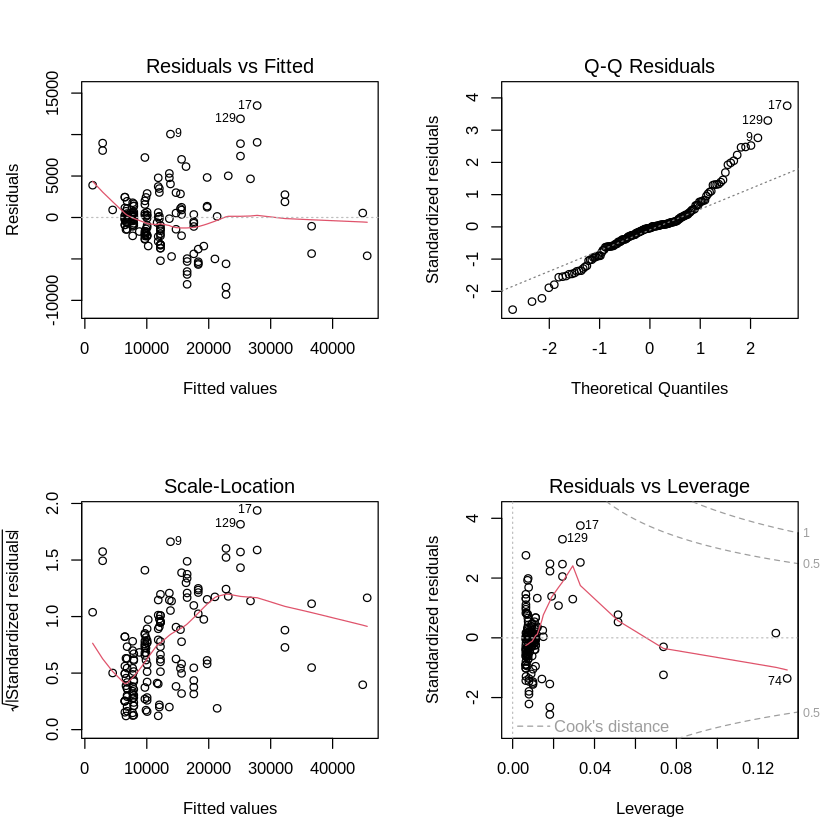

In [ ]:
#Developing a linear regression model between enginesize and price

#create the linear regression model
modelEngine <- lm(price ~ enginesize, data = train)

#view the linear regression model
summary(modelEngine)

#visualize the results with a scatter plot and regression line
plot(train$enginesize, train$price, main = "Linear Regression", xlab = "Engine Size (cc)", ylab = "Car Price ($)")
abline(modelEngine, col = "red")

# Report the results
cat("The slope of the regression line is", round(coef(modelEngine)[2], 2), "and the intercept is", round(coef(modelEngine)[1], 2), ".")

# Plot the residuals but first set display to a 2x2 format
par(mfrow=c(2,2))
plot(modelEngine)
par(mfrow=c(1,1))


Call:
lm(formula = price ~ horsepower, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14149.6  -2018.3   -338.1   1622.7  18059.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4876.105   1037.373   -4.70 5.69e-06 ***
horsepower    175.091      9.577   18.28  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4622 on 155 degrees of freedom
Multiple R-squared:  0.6832,	Adjusted R-squared:  0.6812 
F-statistic: 334.3 on 1 and 155 DF,  p-value: < 2.2e-16


The slope of the regression line is 175.09 and the intercept is -4876.1 .

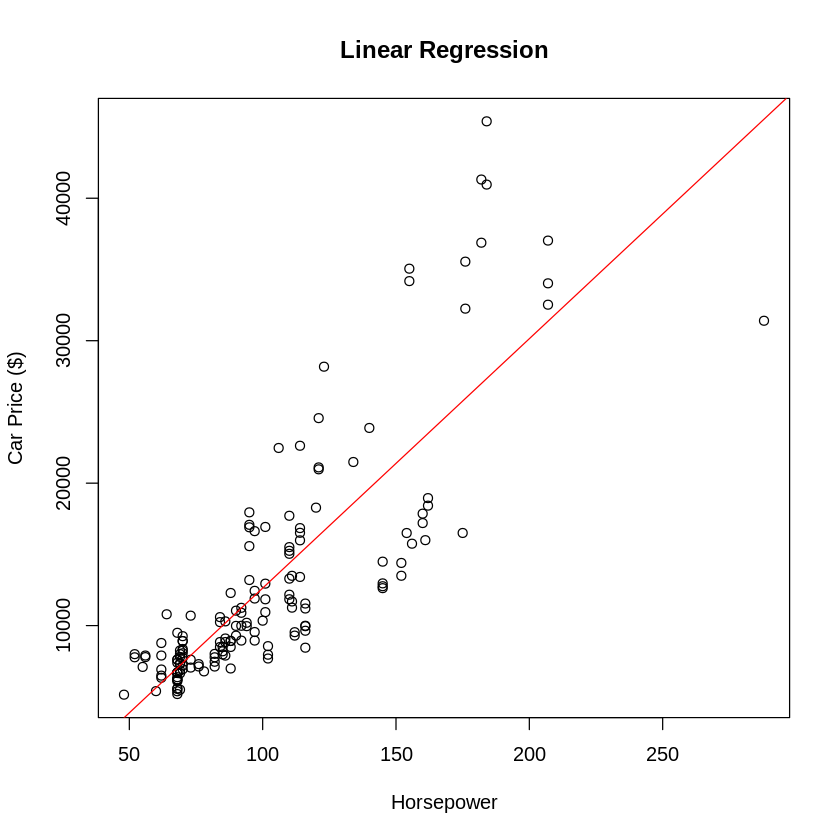

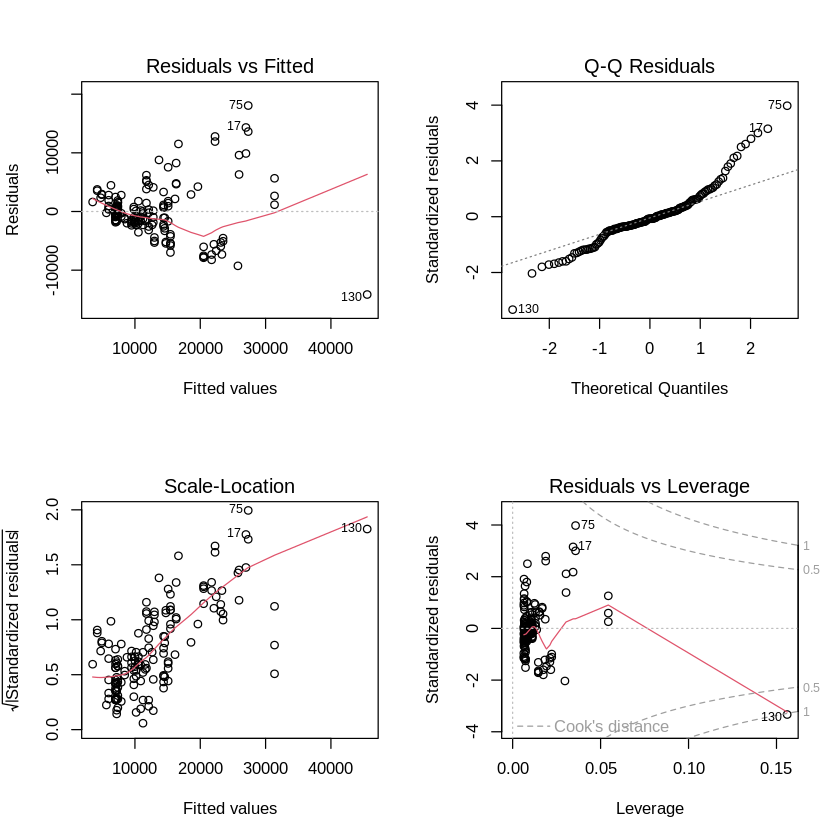

In [ ]:
#Developing a linear regression model between horsepower and price

#create the linear regression model
modelPower <- lm(price ~ horsepower, data = train)

#view the linear regression model
summary(modelPower)

#visualize the results with a scatter plot and regression line
plot(train$horsepower, train$price, main = "Linear Regression", xlab = "Horsepower", ylab = "Car Price ($)")
abline(modelPower, col = "red")

# Report the results
cat("The slope of the regression line is", round(coef(modelPower)[2], 2), "and the intercept is", round(coef(modelPower)[1], 2), ".")

# Plot the residuals but first set display to a 2x2 format
par(mfrow=c(2,2))
plot(modelPower)
par(mfrow=c(1,1))


Call:
lm(formula = price ~ curbweight + enginesize + horsepower, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
 -9710  -1311      3   1297  12632 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12865.923   1505.845  -8.544 1.23e-14 ***
curbweight       2.440      1.045   2.334   0.0209 *  
enginesize     110.173     14.543   7.576 3.17e-12 ***
horsepower      56.462     12.053   4.685 6.15e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3336 on 153 degrees of freedom
Multiple R-squared:  0.8371,	Adjusted R-squared:  0.834 
F-statistic: 262.2 on 3 and 153 DF,  p-value: < 2.2e-16


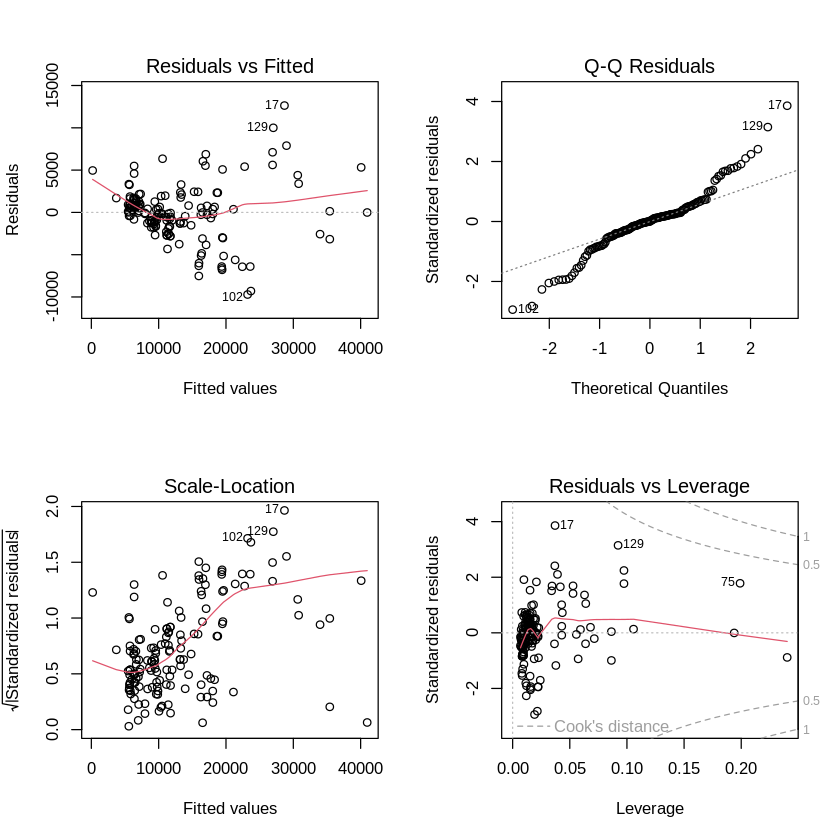

In [ ]:
# Perform the multiple linear regression analysis
modelMLR <- lm(price ~ curbweight + enginesize + horsepower, data = train)

# Check the model summary
summary(modelMLR)

# Plot the residuals but first set display to a 2x2 format
par(mfrow=c(2,2))
plot(modelMLR)
par(mfrow=c(1,1))

**Step 6: Evaluate the Results of the Linear Regression Models**

After building the linear regression models with the test data, evaluate the results of both the simple linear regression models and the multiple linear regression model.

Based on the summary of each model, address the following:
*   What did you learn from the residuals?
*   What did you learn from the standard errors?
*   What did you learn from the p-value?
*   What did you learn from the R-squared value?
*   What did you learn from the Q-Q Residuals plot?





**Step 7: Apply Models to Testing Data**

In this step you apply the modesl built in Step 5 to the test data to determined how well the model predicted the car prices in the test data.

In [ ]:
#Apply the models and then build dataframes from the results

# Apply the each model to the testing dataset
predictCurb <- predict(modelCurb, newdata = test)
predictEngine <- predict(modelEngine, newdata = test)
predictPower <- predict(modelPower, newdata = test)
predictMLR <- predict(modelMLR, newdata = test)

# Create a dataframe for the results of each model and the actual car price
# from the test data while formatting the estimated value as an integer
CurbData <- data.frame(ID = as.integer(rownames(test)), Predicted = round(predictCurb, digits=0), Observed = test$price,
  Curb = test$curbweight, Engine = test$enginesize, Power = test$horsepower)
EngineData <- data.frame(ID = as.integer(rownames(test)), Predicted = round(predictEngine, digits=0), Observed = test$price,
  Curb = test$curbweight, Engine = test$enginesize, Power = test$horsepower)
PowerData <- data.frame(ID = as.integer(rownames(test)), Predicted = round(predictPower, digits=0), Observed = test$price,
  Curb = test$curbweight, Engine = test$enginesize, Power = test$horsepower)
MLRData <- data.frame(ID = as.integer(rownames(test)), Predicted = round(predictMLR, digits=0), Observed = test$price)

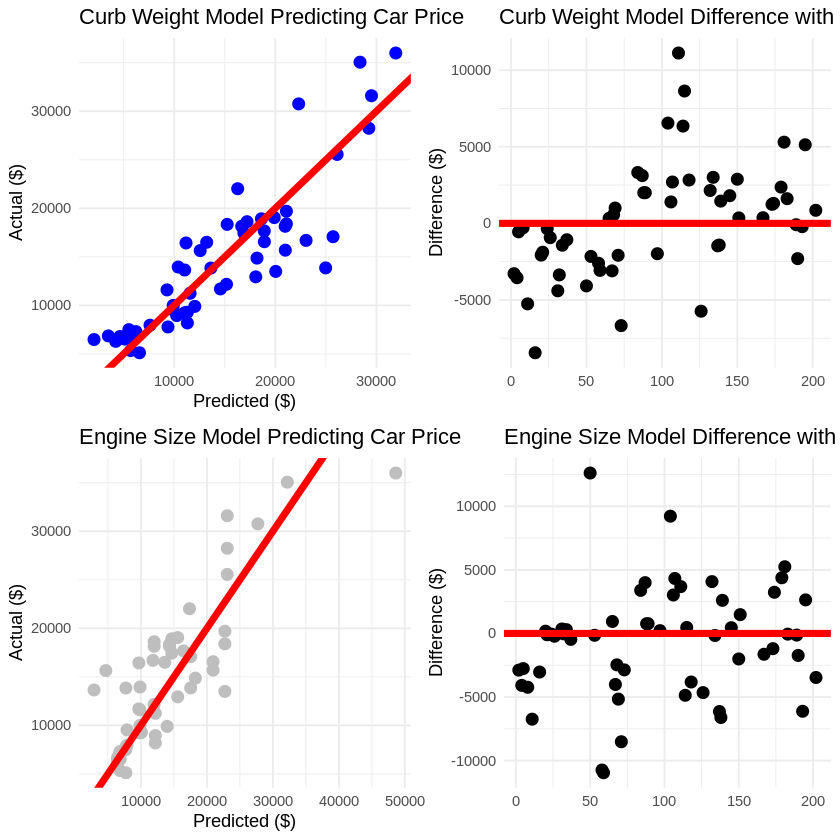

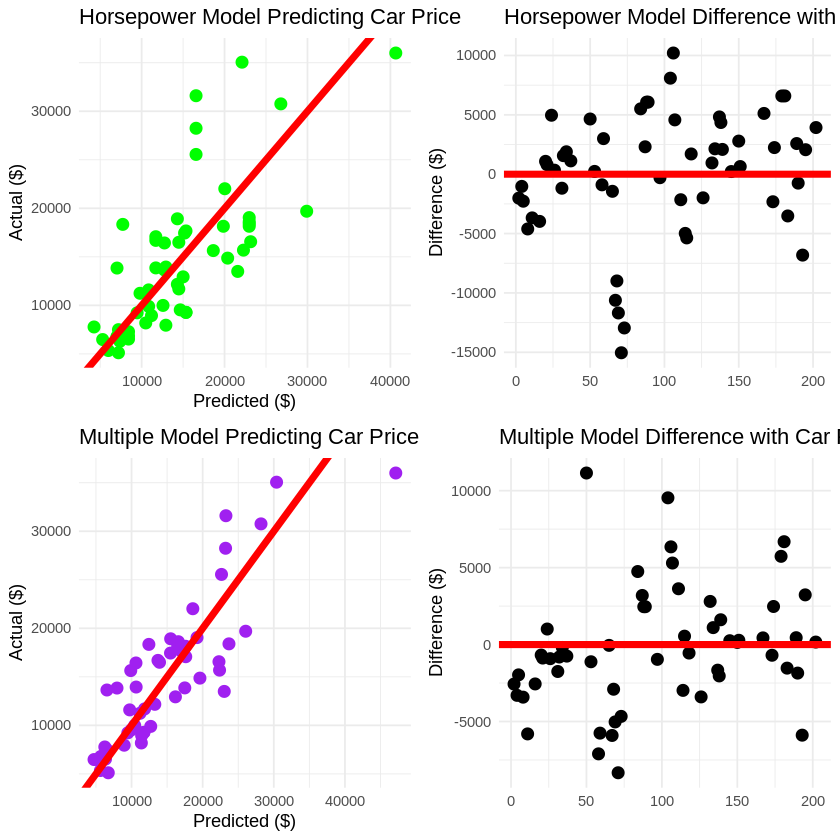

In [ ]:
#Compare actual vs predicted car prices based on the simple and multiple
#linear regression models

# Plot the results of each model against actuals
CurbPlot1 <-
  ggplot(CurbData, aes(x = Predicted, y = Observed)) +
    geom_point(color = "blue", size = 3) +
    labs(title = "Curb Weight Model Predicting Car Price", x = "Predicted ($)", y = "Actual ($)") +
    geom_abline(intercept = 0, slope = 1, color = "red", linewidth = 2) +
    theme_minimal()

EnginePlot1 <-
  ggplot(EngineData, aes(x = Predicted, y = Observed)) +
    geom_point(color = "grey", size = 3) +
    labs(title = "Engine Size Model Predicting Car Price", x = "Predicted ($)", y = "Actual ($)") +
    geom_abline(intercept = 0, slope = 1, color = "red", linewidth = 2) +
    theme_minimal()

PowerPlot1 <-
  ggplot(PowerData, aes(x = Predicted, y = Observed)) +
    geom_point(color = "green", size = 3) +
    labs(title = "Horsepower Model Predicting Car Price", x = "Predicted ($)", y = "Actual ($)") +
    geom_abline(intercept = 0, slope = 1, color = "red", linewidth = 2) +
    theme_minimal()

MLRPlot1 <-
  ggplot(MLRData, aes(x = Predicted, y = Observed)) +
    geom_point(color = "purple", size = 3) +
    labs(title = "Multiple Model Predicting Car Price", x = "Predicted ($)", y = "Actual ($)") +
    geom_abline(intercept = 0, slope = 1, color = "red", linewidth = 2) +
    theme_minimal()


# Plot the differences
CurbPlot2 <-
  ggplot(CurbData, aes(x = ID, y = Predicted - Observed)) +
    geom_point(color = "black", size = 3) +
    labs(title = "Curb Weight Model Difference with Car Price", x = "", y = "Difference ($)") +
    geom_abline(intercept = 0, slope = 0, color = "red", linewidth = 2) +
    theme_minimal()

EnginePlot2 <-
  ggplot(EngineData, aes(x = ID, y = Predicted - Observed)) +
    geom_point(color = "black", size = 3) +
    labs(title = "Engine Size Model Difference with Car Price", x = "", y = "Difference ($)") +
    geom_abline(intercept = 0, slope = 0, color = "red", linewidth = 2) +
    theme_minimal()

 PowerPlot2 <-
  ggplot(PowerData, aes(x = ID, y = Predicted - Observed)) +
    geom_point(color = "black", size = 3) +
    labs(title = "Horsepower Model Difference with Car Price", x = "", y = "Difference ($)") +
    geom_abline(intercept = 0, slope = 0, color = "red", linewidth = 2) +
    theme_minimal()

MLRPlot2 <-
  ggplot(MLRData, aes(x = ID, y = Predicted - Observed)) +
    geom_point(color = "black", size = 3) +
    labs(title = "Multiple Model Difference with Car Price", x = "", y = "Difference ($)") +
    geom_abline(intercept = 0, slope = 0, color = "red", linewidth = 2) +
    theme_minimal()


#Diplay sets of plots in a 2x2 matrix
ggarrange(CurbPlot1, CurbPlot2, EnginePlot1, EnginePlot2, ncol=2, nrow=2)
ggarrange(PowerPlot1, PowerPlot2, MLRPlot1, MLRPlot2, ncol=2, nrow=2)

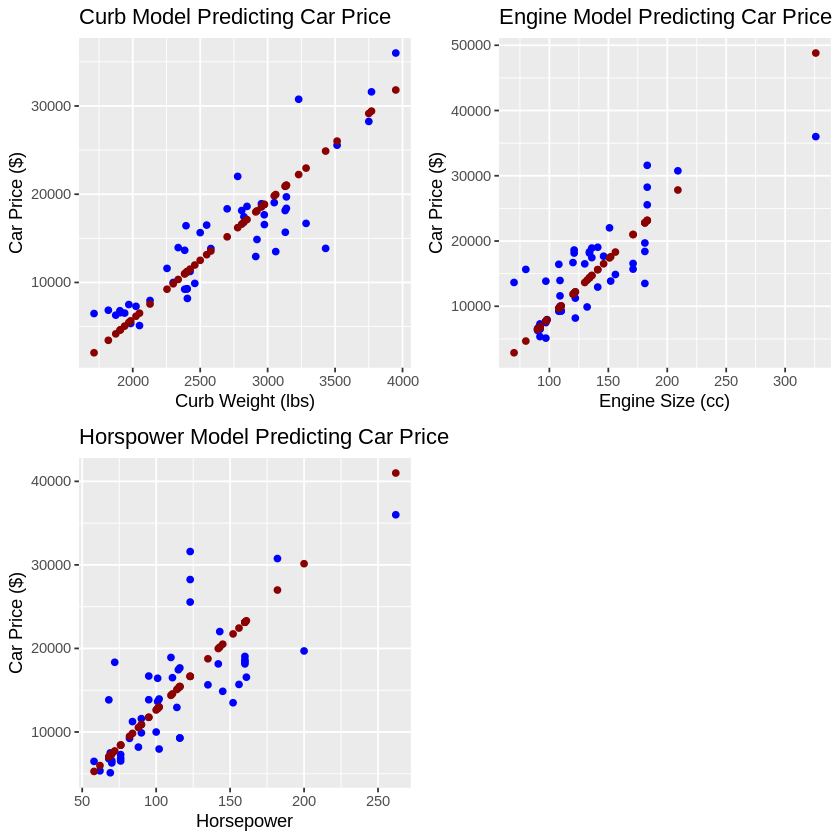

In [ ]:
# Simple Linear Models: Overlay the actual vs predicted house price based on lot size
CurbOverlay <-
  ggplot() +
    geom_point(data = CurbData, aes(x = CurbData$Curb, y = CurbData$Observed), color = "blue") +
    geom_point(data = test, aes(x = CurbData$Curb, y = CurbData$Predicted), color = "darkred") +
    labs(title = "Curb Model Predicting Car Price", x = "Curb Weight (lbs)", y = "Car Price ($)")

EngineOverlay <-
  ggplot() +
    geom_point(data = EngineData, aes(x = EngineData$Engine, y = EngineData$Observed), color = "blue") +
    geom_point(data = test, aes(x = EngineData$Engine, y = EngineData$Predicted), color = "darkred") +
    labs(title = "Engine Model Predicting Car Price", x = "Engine Size (cc)", y = "Car Price ($)")

PowerOverlay <-
  ggplot() +
    geom_point(data = PowerData, aes(x = PowerData$Power, y = PowerData$Observed), color = "blue") +
    geom_point(data = test, aes(x = PowerData$Power, y = PowerData$Predicted), color = "darkred") +
    labs(title = "Horspower Model Predicting Car Price", x = "Horsepower", y = "Car Price ($)")

#Diplay sets of plots in a 2x2 matrix
ggarrange(CurbOverlay, EngineOverlay, PowerOverlay, ncol=2, nrow=2)

In [ ]:
#Evaluate each of the models using the Root Mean Squared Error (RMSE)
# to measure the average prediction error

writeLines("RMSE for Model Performance Against Test Data")
writeLines("------------------------------------------------------")
cat("Curb Weight:", round(rmse(CurbData$Observed, CurbData$Predicted), digits=0),'\n')
cat("Engine Size:", round(rmse(EngineData$Observed, EngineData$Predicted), digits=0),'\n')
cat("Horsepower: ", round(rmse(PowerData$Observed, PowerData$Predicted), digits=0),'\n')
cat("Multiple:   ", round(rmse(MLRData$Observed, MLRData$Predicted), digits=0),'\n')

writeLines("\nR Squared for Model Performance on Training Data")
writeLines("------------------------------------------------------")
cat("Curb Weight:", round(summary(modelCurb)$r.squared, digits=2),'\n')
cat("Engine Size:", round(summary(modelEngine)$r.squared, digits=2),'\n')
cat("Horsepower: ", round(summary(modelPower)$r.squared, digits=2),'\n')
cat("Multiple:   ", round(summary(modelMLR)$r.squared, digits=2))

RMSE for Model Performance Against Test Data
------------------------------------------------------
Curb Weight: 3500 
Engine Size: 4695 
Horsepower:  5105 
Multiple:    4137 

R Squared for Model Performance on Training Data
------------------------------------------------------
Curb Weight: 0.68 
Engine Size: 0.8 
Horsepower:  0.68 
Multiple:    0.84

**Step 8: Summarize the Results**

After applying the regression models agains the test data, summarize the performance of these models against the test data.

Hint: *There is a reason why we calculated the R-squared and RMSE values.*

**Step 9: Explain the Findings**

After evaluating your models, explain the findings from the study. Explain the findings as you would to your customer/client/stakeholder. Was the analysis successful? Can we predict the dependent variable? If so, how accurately? Is this model sufficient for operational use or is more development needed? Why?